**Important! Please do not remove any cells, including the test cells, even if they appear empty. They contain hidden tests, and deleting them could result in a loss of points, as the exercises are graded automatically. Only edit the cells where you are instructed to write your solution. Please read all the instructions in each notebook carefully.**  

# Exercise 1
## Part 2. NumPy Implementation for Network Training

In the second part of this assignment, you will implement the same network given in the pen-and-paper task using **NumPy**.

### Objective

Your task is to work with a class-based structure to represent the key components of the neural network. You will be given a template code for each of these components. You are expected to implement the necessary parts step by step. The goal is to help you get familiar with the fundamental building blocks of a neural network and understand how they are formed together.

You will implement and train the given computational graph by following these steps:
1. Linear layer: implementation of backward and forward passes and parameter update
2. Tanh activation function: implementation of backward and forward passes
3. Multilayer Perceptron (MLP): building the model architecture by combining Linear and Tanh layers
4. Mean Squared Error Loss: computation of the loss and its gradients with respect to the model's output
5. Training loop: no implementation is required, you will observe the model's training progress.


<div style="text-align: center;">
    <figure>
        <img src="ex1_graph_01-3.png" alt="Image Title" style="width:900px; height:auto;"/>
        <figcaption>Figure 1: Forward and Backward Pass in the MLP</figcaption>
    </figure>
</div>


##### Important Note:
1. In the implementation of the components, it is important that the forward and backward passes operate on the same data. Since the forward pass is **always** executed first, we store the necessary input data as class attributes during the forward pass. In this way, we ensure that the same data is accessed during the backward pass without any changes between the two passes. For instance, the input $x$ that is used in both the forward and backward pass of the Linear layer will be passed as an argument to the `forward()` method and stored as a class attribute (e.g. `self.x`) to be accessed in the `backward()` method. You will notice this practice repeated in the implementation of different components.
2. Throughout the assignment, you are expected to implement the sections marked as:
   ```python
    # YOUR CODE HERE
    raise NotImplementedError()
   ```
   In some parts of the code, certain variables are initialized as `None` (e.g., self.grad_weights = None). These are placeholders to guide you on which steps are expected from you. You should overwrite these `None` values with the correct computations as part of your solution.

In [34]:
# Do not delete this cell

### Import the necessary libraries

In [35]:
import matplotlib.pyplot as plt
import numpy as np

from IPython import display

### 1. Linear layer
You are given a template code of the Linear class with the following methods:
- `__init__()` to initialize the weights and biases.
- `forward()` to handle the forward pass.
- `backward()` to handle the backward pass.
- `update_params()` to update the weights and biases using the calculated gradients.

Start by implementing the forward pass, then proceed with the backward pass, and finally implement the parameter updates.

##### Steps to follow:
##### 1. Forward pass:
Compute the layer's output $y = W x + b$, where $W$ and $b$ are the weight matrix and bias, and $x$ is the input to the linear layer.
##### 2. Backward pass:
You need to compute the gradient of the loss with respect to the layer's **input**, **weights**, and **biases**.  The `backward()` method receives the argument `grad_output`, which represents the gradient of the loss with respect to this layer's output, coming from the next layer in the network.  You need to use `grad_output` in your calculations when computing the gradients of the loss. You can refer to the computational graph in Figure 1 to understand the flow of gradients through the network.
##### 3. Update parameters:
Use the computed gradients to update the parameters (weights and biases for the next iteration) with the given `learning_rate`.
##### Hints:
1. **Matrix shapes:** Make sure that the shapes of your input, weights, and biases are compatible during the matrix multiplications.  You are expected to implement $y = W x + b$ for a **batch of inputs**. For a single input sample, _x_ is typically a column vector, but when dealing with multiple input samples, the input matrix will contain one row for each input sample. Pay attention to the shapes provided in the docstring of each method, and apply the transpose where necessary.
2. **Backward pass gradients:** During the backward pass, you need to return only the gradient of the loss with respect to the input (`self.grad_input`). This is necessary because it will be passed to the preceding layers as part of the chain rule during backpropagation. However, you also need to compute `self.grad_weight` and `self.grad_bias`. These gradients will not be returned as they do not contribute to the chain rule for the coming layers, but they will be used internally during the parameter update.

In [36]:
class Linear:
    def __init__(self, input_dim, output_dim, initial_weights=None, initial_biases=None):
        """
        Initialize weights and biases

        Args:
        - input_dim (int): Number of input features.
        - output_dim (int): Number of output features.
        - initial_weights (np.array): Initial weights of shape (output_dim, input_dim).
        - initial_biases (np.array): Initial biases of shape (output_dim,).
        """
        if initial_weights is None: initial_weights = np.random.randn(output_dim, input_dim)
        if initial_biases is None: initial_biases = np.random.randn(output_dim)
        self.weights = initial_weights
        self.biases = initial_biases

    def forward(self, x):
        """
        Compute the linear transformation

        Args:
        - x (np.array): Input data of shape (num_samples, input_dim).

        Returns:
        - output (np.array): Output data of shape (num_samples, output_dim).
        """
        self.x = x # Keep this to use in backward method
        # Compute self.output
        self.output = (x @ self.weights.T) + self.biases
        return self.output

    def backward(self, grad_output):
        """
        Perform the backward pass of the Linear layer.

        Args:
        - grad_output (np.array): Gradient of the loss with respect to the output with shape (num_samples, output_dim).

        Returns:
        - grad_input (np.array): Gradient of the loss with respect to the input with shape (num_samples, input_dim).
        """
        # Compute self.grad_weights, self.grad_biases, self.grad_input
        assert hasattr(self, 'x'), 'Perform forward pass first.'
        self.grad_weights = grad_output.T@self.x
        self.grad_biases = np.sum(grad_output, axis=0)
        self.grad_input  = grad_output @ self.weights

        return self.grad_input

    def update_params(self, learning_rate):
        """
        Update the weights and biases using the calculated gradients.

        Args:
        - learning_rate (float): Learning rate for updating parameters.
        """
        self.weights = self.weights - learning_rate*self.grad_weights
        self.biases = self.biases - learning_rate*self.grad_biases

In [37]:
feedback_txt = []

def test_linear_calls():
    num_samples, input_dim, output_dim = 5, 3, 4
    all_tests_successful = True

    x_dummy = np.random.randn(num_samples, input_dim)
    w_dummy = np.random.randn(output_dim, input_dim)
    b_dummy = np.random.randn(output_dim)
    grad_output_dummy = np.random.randn(num_samples, output_dim)
    learning_rate = 0.5

    # Forward pass
    linear_layer = Linear(input_dim=input_dim, output_dim=output_dim, initial_weights=w_dummy.copy(), initial_biases=b_dummy.copy())
    output = linear_layer.forward(x_dummy)

    if output is None:
        all_tests_successful = False
        feedback_txt.append("Visible test: Forward output is not implemented or set as None.")
        raise AssertionError(f"Forward output is not implemented or set as None.")
    else:
        try:
            assert output.shape == (num_samples, output_dim), f'Expected output shape: {(num_samples, output_dim)}, but got: {output.shape}'
        except Exception as e:
            all_tests_successful = False
            feedback_txt.append(f"Visible test, {str(e)}")
            raise

    # Backward pass
    grad_input = linear_layer.backward(grad_output_dummy)

    if grad_input is None:
        all_tests_successful = False
        feedback_txt.append(f"Visible test. Backward pass returned None for grad_input.")
        raise AssertionError(f"Backward pass returned None for grad_input.")
    else:
        try:
            assert grad_input.shape == (num_samples, input_dim), f'Expected grad_input shape: {(num_samples, input_dim)}, but got: {grad_input.shape}'
        except Exception as e:
            all_tests_successful = False
            feedback_txt.append(f'Visible test, {str(e)}')
            raise

    if linear_layer.grad_weights is None:
        all_tests_successful = False
        feedback_txt.append(f"Visble test, grad_weights is not implemented or set as None.")
        raise AssertionError(f"grad_weights is not implemented or set as None.")
    else:
        try:
            assert linear_layer.grad_weights.shape == (output_dim, input_dim), f'Expected grad_weights shape: {(output_dim, input_dim)}, but got: {linear_layer.grad_weights.shape}'
        except Exception as e:
            all_tests_successful = False
            feedback_txt.append(f"Visible test. {str(e)}")
            raise

    if linear_layer.grad_biases is None:
        all_tests_successful = False
        feedback_txt.append(f"Visble test, grad_biases is not implemented or set as None.")
        raise AssertionError("Visble test, grad_biases is not implemented or set as None.")
    else:
        try:
            assert linear_layer.grad_biases.shape == (output_dim,), f'Expected grad_biases shape: {(output_dim,)}, but got: {linear_layer.grad_biases.shape}'
        except Exception as e:
            all_tests_successful = False
            feedback_txt.append(f'Expected grad_biases shape: {(output_dim,)}, but got: {linear_layer.grad_biases.shape}')
            raise

    # Save the current weights and biases for comparison
    old_weights = linear_layer.weights.copy()
    old_biases = linear_layer.biases.copy()

    # Update parameters
    linear_layer.update_params(learning_rate)

    # Ensure weights and biases are updated (not the same as before)
    if np.allclose(linear_layer.weights, old_weights):
        all_tests_successful = False
        msg = "Weights were not updated correctly."
        feedback_txt.append(f"Visible test, {msg}")
        raise AssertionError(msg)

    if np.allclose(linear_layer.biases, old_biases):
        all_tests_successful = False
        msg = "Visible test: Biases were not updated correctly."
        feedback_txt.append(f"Visible test, {msg}")
        raise AssertionError(msg)

    if linear_layer.weights.shape != (output_dim, input_dim):
        all_tests_successful = False
        msg = f"Visible test: Expected weights shape {(output_dim, input_dim)}, but got {linear_layer.weights.shape}."
        feedback_txt.append(f"Visible test, {msg}")
        raise AssertionError(msg)

    if linear_layer.biases.shape != (output_dim,):
        all_tests_successful = False
        msg = f"Visible test: Expected biases shape {(output_dim,)}, but got {linear_layer.biases.shape}."
        feedback_txt.append(f"Visible test, {msg}")
        raise AssertionError(msg)


    if all_tests_successful:
        print("\033[92mVisible tests for linear layer passed successfully!\033[0m")
    else:
        raise AssertionError("One or more visible tests failed.")

test_linear_calls()

Visible tests for linear layer passed successfully!


In order to check your `backward()` method, you can validate it by comparing your computation with gradients computed via [numerical differentiation](https://en.wikipedia.org/wiki/Numerical_differentiation) in the form:

$$
\frac{\partial f}{\partial x} ≈ \frac{f(x+ \epsilon) - f(x-\epsilon)}{2\epsilon},
$$

where $f(x)$ is a function of the input vector $x$, and $\epsilon$ is a small deviation value.

In the code below, we first define a utility function `compute_numerical_gradient()` to compute the gradient of the forward pass of a layer with respect to its input.

##### Note:
- Although this function calculates the gradient of a **layer's output** with respect to its input, remember that in our implementation, we are also using the gradient from subsequent layers (i.e., `grad_output`) to handle the chain rule in each layer. So, make sure to correctly handle `grad_output` in your implementation to compute the gradient of the **loss** with respect to the layer's input.

In [38]:
def compute_numerical_gradient(layer, x, eps=1e-4):
    """
    Compute the numerical gradient of the forward pass with respect to the input x.

    Args:
    - layer: The layer whose forward pass we are testing.
    - x (np.array): Input data of shape (num_samples, num_features).
    - eps (float): Small deviation value for numerical gradient calculation.

    Returns:
    - numerical_grad (np.array): The numerical gradient of shape (num_samples, num_features).
    """
    assert hasattr(layer, 'forward'), 'layer must have a forward method'
    assert x.ndim == 2, f'Expected 2D array x, but got {x.ndim}D'
    num_samples, num_features = x.shape
    numerical_grad = np.zeros_like(x)  # Initialize the gradient matrix

    # Loop over each sample and feature
    for i in range(num_samples):
        for j in range(num_features):
            # Create perturbed inputs
            x_pos = x.copy()
            x_neg = x.copy()

            x_pos[i, j] += eps
            x_neg[i, j] -= eps

            # Compute the forward pass
            y_pos = layer.forward(x_pos)
            y_neg = layer.forward(x_neg)

            # Approximate the gradient using finite differences
            numerical_grad[i, j] = (y_pos - y_neg).sum() / (2 * eps)

    return numerical_grad

In [39]:
# This checks if dy/dx works correctly.
# Make sure that your backward function also considers grad_output to return dL/dx
def test_gradients():
    num_samples, input_dim, output_dim = 5, 3, 4
    eps = 1e-4
    x_dummy = np.random.randn(num_samples, input_dim)
    w_dummy = np.random.randn(output_dim, input_dim)
    b_dummy = np.random.randn(output_dim)
    grad_output_dummy = np.ones((num_samples, output_dim)) # Dummy gradient for the output layer

    linear_layer = Linear(input_dim=input_dim, output_dim=output_dim,
                          initial_weights=w_dummy.copy(), initial_biases=b_dummy.copy())

    output = linear_layer.forward(x_dummy) # Forward pass
    analytical_grad = linear_layer.backward(grad_output_dummy) # Backward pass (your implementation)
    numerical_grad = compute_numerical_gradient(linear_layer, x_dummy) # Compute numerical gradient

    assert np.allclose(analytical_grad, numerical_grad, atol=1e-4), f'Gradients do not match. Analytical: {analytical_grad}, Numerical: {numerical_grad}'

    if not np.allclose(analytical_grad, numerical_grad, atol=1e-4):
        msg = f'Gradients do not match. Analytical: {analytical_grad}, Numerical: {numerical_grad}'
        feedback_txt.append(f"Visible test, {msg}")
        raise AssertionError(msg)
    else:
         print("\033[92mVisible numerical gradient test passed successfully!\033[0m")

test_gradients()

Visible numerical gradient test passed successfully!


In [40]:
# This cell contains hidden test cases that will be evaluated after submission

In [41]:
# This cell contains hidden test cases that will be evaluated after submission

In [42]:
# This cell contains hidden test cases that will be evaluated after submission

### 2. Tanh Activation Function
You are given a template code of the **Tanh** class with the following methods:
- `forward()` to apply the Tanh activation function in the forward pass.
- `backward()` to compute the gradient of the loss with respect to the input.

The hyperbolic tangent (Tanh) is defined as: $\text{tanh}(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$.

##### Steps to follow:
##### 1. Forward pass:
Apply the Tanh activation function on the given input data `x` to the function. You can use [NumPy's tanh function](https://numpy.org/doc/2.0/reference/generated/numpy.tanh.html).
##### 2. Backward pass:
Use the chain rule along with the derivative of Tanh $\frac{\partial}{\partial x} \text{tanh}(x)$. Combine this with the incoming `grad_output` from its following layers to compute the gradient with respect to the input.

In [43]:
class Tanh:
    def forward(self, x):
        """
        Apply the Tanh activation function.

        Args:
        - x (np.array): Input data of shape (num_samples, input_dim).

        Returns:
        - output (np.array): Activated output data of shape (num_samples, input_dim).
        """
        self.x = x # Keep this for backward computation
        self.output = np.tanh(self.x)
        return self.output

    def backward(self, grad_output):
        """
        Compute the gradient of the loss with respect to the input of Tanh.

        Args:
        - grad_output (np.array): Gradient of the loss with respect to the output.

        Returns:
        - grad_input (np.array): Gradient of the loss with respect to the input.
        """
        assert hasattr(self, 'x'), 'Perform forward pass first.'
        self.grad_input = grad_output * (1 - self.output**2)
        return self.grad_input

In [44]:
def test_tanh_shapes():
    num_samples, input_dim = 3,4
    x_dummy = np.random.randn(num_samples,input_dim)
    tanh_layer = Tanh()
    y_dummy = tanh_layer.forward(x_dummy)
    grad_output = np.random.randn(num_samples, input_dim)
    grad_input = tanh_layer.backward(grad_output)

    if grad_input.shape != x_dummy.shape:
        msg = f"Expected grad_input shape {x_dummy.shape}, but got {grad_input.shape}."
        feedback_txt.append(f"Visible test: {msg}")
        raise AssertionError(msg)
    else:
        print("\033[92mVisible shape test for Tanh passed successfully!\033[0m")

test_tanh_shapes()

Visible shape test for Tanh passed successfully!


In [45]:
# This checks if d(tanh)/dx works correctly.
# Make sure that your backward function also considers grad_output - coming back from subsequent layers
def test_gradients():
    num_samples, input_dim = 3,4
    eps = 1e-4
    x_dummy = np.random.randn(num_samples,input_dim)
    tanh_layer = Tanh()

    grad_output_dummy = np.ones((num_samples, input_dim)) # Dummy gradient for the output layer
    output = tanh_layer.forward(x_dummy) # Forward pass
    analytical_grad = tanh_layer.backward(grad_output_dummy) # Backward pass (your implementation)
    numerical_grad = compute_numerical_gradient(tanh_layer, x_dummy) # Compute numerical gradient

    if not np.allclose(analytical_grad, numerical_grad, atol=1e-4):
        msg = f'Gradients do not match. Analytical: {analytical_grad}, Numerical: {numerical_grad}'
        feedback_txt.append(f"Visible test, {msg}")
        raise AssertionError(msg)
    else:
        print("\033[92mVisible numerical gradient test passed successfully!\033[0m")

test_gradients()

Visible numerical gradient test passed successfully!


In [46]:
# This cell contains hidden test cases that will be evaluated after submission

### 3. Multilayer Perceptron (MLP)

In this step, we will combine the Linear layer and Tanh activation to build the complete model architecture. The MLP class will have two layers and Tanh activation in between.

You are given a template code of the **MLP** class using instances of **Linear** and **Tanh** classes. The layers for the model architecture are already initialized and the forward pass is given. Your task is to implement the **backward pass** and **parameter updates**.

##### Steps to follow:
1. Backward pass. You will propagate the gradients in reverse order:
    - Use the `grad_output` to compute the gradients for the second linear layer (output layer).
    - Propagate these gradients through Tanh activation function.
    - Propagate the gradients through the first Linear layer.
2. You also need to update the parameters of each linear layer.
   
You will use the backward() methods of the Linear and Tanh classes and update_params() of the Linear class that you implemented earlier.

In [47]:
class MLP:
    def __init__(self, input_dim, hidden_dim, output_dim):
        """
        Initialize the MLP with the necessary layers.

        Args:
        - input_dim (int): Number of input features.
        - hidden_dim (int): Number of units in the hidden layer.
        - output_dim (int): Number of units in the output layer.
        """
        # Initialize the linear layers and activation function
        self.linear1 = Linear(input_dim, hidden_dim)
        self.activation = Tanh()
        self.linear2 = Linear(hidden_dim, output_dim)

    def forward(self, x):
        """
        Forward pass through the MLP.

        Args:
        - x (np.array): Input data.

        Returns:
        - output (np.array): Output of the MLP.
        """
        hidden = self.linear1.forward(x)
        activated_hidden = self.activation.forward(hidden)
        output = self.linear2.forward(activated_hidden)
        return output

    def backward(self, grad_output):
        """
        Backward pass through the MLP.

        Args:
        - grad_output (np.array): Gradient of the loss with respect to the MLP output.

        Returns:
        - grad_input (np.array): Gradient of the loss with respect to the MLP input.
        """
        grad_for_linear2_input = self.linear2.backward(grad_output)
        grad_for_activation_input = self.activation.backward(grad_for_linear2_input)
        grad_input = self.linear1.backward(grad_for_activation_input)
        return grad_input

    def update_params(self, learning_rate):
        """
        Update the parameters of the MLP.

        Args:
        - learning_rate (float): Learning rate for parameter updates.
        """
        self.linear1.update_params(learning_rate)
        self.linear2.update_params(learning_rate)

In [48]:
# Test case to check the shape of gradient wrt input after backward pass
def test_mlp_gradient_shapes():
    input_dim, hidden_dim, output_dim = 3, 2, 1
    num_samples = 5  # Test with a batch of 5 samples
    x_dummy = np.random.randn(num_samples, input_dim)  # Input with shape (num_samples, input_dim)
    grad_output_dummy = np.random.randn(num_samples, output_dim)  # Gradient of shape (num_samples, output_dim)
    learning_rate = 0.01

    # Initialize the MLP model
    mlp = MLP(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim)

    # Forward pass
    y_pred = mlp.forward(x_dummy)

    # Backward pass
    grad_input = mlp.backward(grad_output_dummy)

    if grad_input.shape != x_dummy.shape:
        msg = f'Expected grad_input shape {x_dummy.shape}, but got {grad_input.shape}'
        feedback_txt.append(f"Visible test: {msg}")
        raise AssertionError(msg)
    else:
        print("\033[92mVisible shape test for MLP gradient wrt input passed.\033[0m")

test_mlp_gradient_shapes()

Visible shape test for MLP gradient wrt input passed.


In [49]:
# This cell contains hidden test cases that will be evaluated after submission

### 4. Mean Squared Error Loss
You are given a template code of the **MSELoss** class with the following methods:
- `forward()` to compute the Mean Squared Error between the predicted output `y` and the target `t`.
- `backward()` to compute the gradient of the loss with respect to the predicted output.

The Mean Squared Error (MSE) loss is defined as: $L = \frac{1}{N} \sum_{i=1}^N (y_{i} - t_{i})^2$, where $y_{i}$ and $t_{i}$ are the predicted and target output for the $i^{th}$ data point and $N$ is the number of data points.

##### Steps to follow:
1. Forward pass:
Apply the MSE Loss for the given predicted output and the true target.
2. Backward pass:
Compute the gradient of the loss with respect to the predicted output $\frac{\partial L}{\partial y}$.


In [50]:
class MSELoss:
    def forward(self, y, t):
        """
        Compute the mean squared error loss.

        Args:
        - y (np.array): Predicted values.
        - t (np.array): True values.

        Returns:
        - loss (float): Computed MSE loss.
        """
        self.y = y
        self.t = t
        self.loss = np.mean((self.y-self.t)**2)
        return self.loss

    def backward(self):
        """
        Compute the gradient of the loss with respect to the predicted output.

        Returns:
        - grad_input (np.array): Gradient of the loss with respect to the predicted output.
        """
        num_samples = self.y.shape[0]
        self.grad_input = (2/num_samples)*(self.y - self.t)
        return self.grad_input



In [51]:
def test_mse_loss_shapes():
    num_samples, output_dim = 5, 3
    all_test_successful = True
    y_dummy = np.random.randn(num_samples, output_dim)
    t_dummy = np.random.randn(num_samples, output_dim)

    mse_loss = MSELoss()

    # Forward pass test
    loss_value = mse_loss.forward(y_dummy, t_dummy)
    if not isinstance(loss_value, float):
        all_test_successful = False
        msg = f'Expected loss to be a float, but got {type(loss_value)}'
        feedback_txt.append("Visible test: {msg}")
        raise AssertionError(msg)

    grad_input = mse_loss.backward()
    assert grad_input.shape == (num_samples, output_dim), f'Expected grad_input shape: {(num_samples, output_dim)}, but got: {grad_input.shape}'

    if grad_input.shape != (num_samples, output_dim):
        all_test_successful = False
        msg = f'Expected grad_input shape: {(num_samples, output_dim)}, but got: {grad_input.shape}'
        feedback_txt.append("Visible test: {msg}")
        raise AssertionError(msg)

    if all_test_successful:
        print("\033[92mVisible shape test for MSELoss passed successfully!\033[0m")

test_mse_loss_shapes()

Visible shape test for MSELoss passed successfully!


In [52]:
# This cell contains hidden test cases that will be evaluated after submission

### 5. Training loop

In this section, we will visualize the training process of the MLP model on a simple synthetic dataset. The training loop will use the components you have implemented. No further implementation is required in this section. If everything is implemented correctly, you should see the model's predictions fit the data over iterations and your loss value should be less than 0.15.

In [53]:
# Generate Data
def generate_data(num_samples=100):
    np.random.seed(4)
    x = np.linspace(-1, 1, num_samples)
    noise = np.random.randn(x.shape[0]) * 0.2
    y = 2 * x**2 + 3 + noise

    x = np.expand_dims(x,1)
    y = np.expand_dims(y,1)

    return x, y

In [54]:
update_plot = True # This will be used to visualize your training loss curve over epochs

In [55]:
# Do not delete this cell

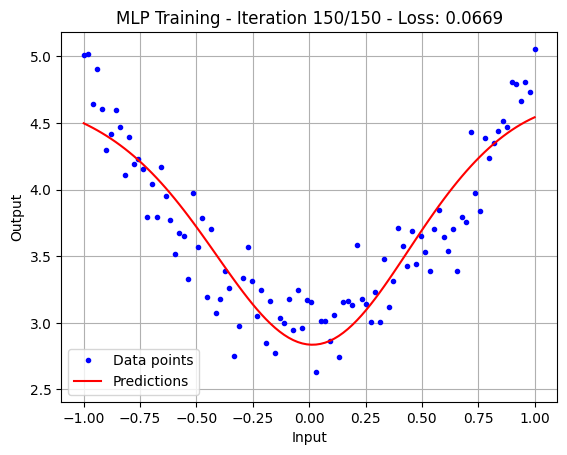

In [56]:
input_dim = 1
hidden_dim = 10
output_dim = 1
learning_rate = 0.1
epochs = 150
# Initialize the MLP model and MSE Loss function
mlp = MLP(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim)
mse_loss = MSELoss()

x, y_train = generate_data()

# Plot setup
fig, ax = plt.subplots()
ax.plot(x, y_train, 'b.', label='Data points')  # Plot the original data
line1, = ax.plot(x, np.full_like(y_train, min(y_train) - 0.1), 'r-', label='Predictions')
ax.grid(True)
ax.set_title(f'MLP Training - Iteration 0/{epochs}')
ax.set_xlabel('Input')
ax.set_ylabel('Output')
plt.legend()

losses = []
for epoch in range(epochs):
    # Forward pass
    y_pred = mlp.forward(x)

    # Compute loss
    loss = mse_loss.forward(y_pred, y_train)
    losses.append(loss)

    grad_loss = mse_loss.backward()
    mlp.backward(grad_loss)
    mlp.update_params(learning_rate)

    if update_plot:
        # Update the plot
        line1.set_ydata(y_pred)
        ax.set_title(f'MLP Training - Iteration {epoch + 1}/{epochs} - Loss: {loss:.4f}')
        plt.pause(0.05)
        display.clear_output(wait=True)
        display.display(fig)

display.clear_output(wait=True)
plt.show()

try:
    assert loss.item() < 0.15, "Visible test: Loss is too high, check your implementation."
except Exception as e:
    msg = f"Visible test: Loss is too high (got {loss.item():.6f}). Expected value < 0.15. Check your implementation."
    feedback_txt.append(msg)
    raise AssertionError(msg)

In [57]:
# Do not delete this cell